In [4]:
#функция обращения к AWS
import boto3

def detect_faces(bolb, attributes=['ALL']):
    rekognition = boto3.client("rekognition")
    response = rekognition.detect_faces(
        Image={"Bytes": bolb,},
        Attributes=attributes,)
    return response['FaceDetails']

In [61]:
#функция получения байтов картинки
import requests
from io import BytesIO
from PIL import Image
import base64

def get_blob(image_url):
    image_file = requests.get(image_url).content
    return image_file

In [36]:
#картинка
url = 'https://nationmagazine.ru/upload/iblock/1a1/1a1e938568787b74fe67cfeba75d22cc.jpg'

In [103]:
#определим лицо на картинке
detect_faces(get_blob(url), attributes=['DEFAULT'])

[{'BoundingBox': {'Height': 0.4538443088531494,
   'Left': 0.13110588490962982,
   'Top': 0.08309399336576462,
   'Width': 0.16742166876792908},
  'Confidence': 99.99971008300781,
  'Landmarks': [{'Type': 'eyeLeft',
    'X': 0.1669648289680481,
    'Y': 0.2797081172466278},
   {'Type': 'eyeRight', 'X': 0.24477501213550568, 'Y': 0.2562812864780426},
   {'Type': 'mouthLeft', 'X': 0.19217240810394287, 'Y': 0.42742979526519775},
   {'Type': 'mouthRight', 'X': 0.25579965114593506, 'Y': 0.40813806653022766},
   {'Type': 'nose', 'X': 0.21743258833885193, 'Y': 0.3406391739845276}],
  'Pose': {'Pitch': -1.3512648344039917,
   'Roll': -14.245810508728027,
   'Yaw': -29.55489158630371},
  'Quality': {'Brightness': 72.51641082763672,
   'Sharpness': 96.61495208740234}}]

In [100]:
#функция для визуализацию
import matplotlib.pyplot as plt
from matplotlib import patches
def custom_sort(t):
    return float(t["Confidence"])
fe = []
def annotate_image(image_url):
    blob = get_blob(image_url)
    faces = detect_faces(blob)    
    
    image_file = BytesIO(requests.get(image_url).content) 
    image = Image.open(image_file) 

    plt.figure(figsize=(8,8)) 
    ax = plt.imshow(image, alpha=0.6) 
    for face in faces: 
        fr = face["BoundingBox"] 
        fa = face
        fe = sorted(face["Emotions"], key = lambda i: float(i['Confidence']), reverse=True)
        origin = (fr["Left"]*image.width, fr["Top"]*image.height) 
        p = patches.Rectangle(origin, fr["Width"]*image.width, \
        fr["Height"]*image.height, fill=False, linewidth=2, color='b') 
        ax.axes.add_patch(p) 
        plt.text(origin[0], origin[1], "%s, %d, %s"%(fa["Gender"]["Value"].capitalize()
                                                     ,((fa["AgeRange"]["High"]+fa["AgeRange"]["Low"])/2)
                                                     , fe[0]["Type"])
                 , fontsize=20, weight="bold", va="bottom") 
    plt.axis("off") 
    plt.show()
    

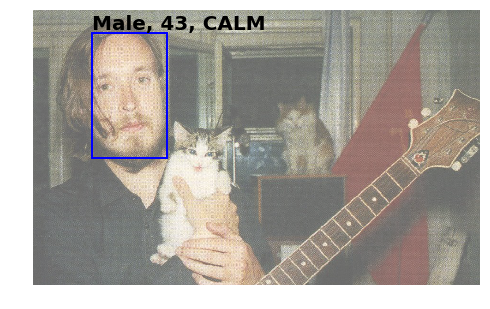

In [104]:
annotate_image(url)
